# Image Types

Load a color image, convert it to a grayscale, binary imagesrespectively, then display them.

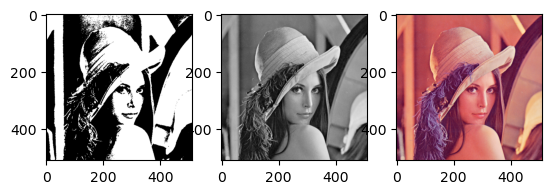

In [1]:
import os
import cv2
import matplotlib.pyplot as plt

path = 'Images'
img_filePath = os.path.join(path, "Lena.png")
img_color = cv2.imread(img_filePath)

# Opencv uses BGR
img_RGB = cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB) 
# Gray image
img_gray = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY) 
# Binary image
ret, img_binary = cv2.threshold(img_gray,127,255,cv2.THRESH_BINARY) 

# Plot images
plt.figure(1)
plt.subplot(1,3,1)
plt.imshow(img_binary, cmap="gray")
plt.subplot(1,3,2)
plt.imshow(img_gray, cmap="gray")
plt.subplot(1,3,3)
plt.imshow(img_RGB)
plt.show()

## Image File Formats

Load a color image in Python and resize it to half (e.g.,from 512x512 to 256x256), then convert it to grayscale and binaryimages respectively. Finally save them to bmp and jpeg format filesrespectively.Compare the file size of bmp and jpeg formats.

In [8]:
import os
import cv2
import matplotlib.pyplot as plt

savedExt = ".jpg"
savedPath = 'Images/File-Formats-Practice'
#savedExt = ".bmp"

# Read and resize image
img_color = cv2.imread(img_filePath)
img_color = cv2.resize(img_color, (256, 256))

# Convert colors
img_RGB = cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB) # Opencv uses BGR
img_gray = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY) # Gray image
_,img_binary = cv2.threshold(img_gray,127,255,cv2.THRESH_BINARY) # Binary image

img_Filename = "Lena"
filename = os.path.join(savedPath, img_Filename)

# Save images using matplotlib
plt.imsave(filename+"_color"+savedExt, img_RGB)
plt.imsave(filename+"_gray"+savedExt, img_gray, cmap = "gray")
plt.imsave(filename+"_binary"+savedExt, img_binary, cmap = "gray")
#cv2.imwrite(filename+"_color"+savedExt, img_color)
#cv2.imwrite(filename+"_gray"+savedExt, img_gray)
#cv2.imwrite(filename+"_binary"+savedExt, img_binary)